In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

In [56]:
oecd_bli = pd.read_csv("oecd_bli_updated.csv")

In [57]:
oecd_bli.count()

Country    39
Value      39
dtype: int64

In [58]:
oecd_bli.columns

Index(['Country', 'Value'], dtype='object')

In [59]:
gdp_per_capita = pd.read_csv("WEO_DATA.xls",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [60]:
gdp_per_capita.count()

Country                          190
Subject Descriptor               189
Units                            189
Scale                            189
Country/Series-specific Notes    189
2018                             186
Estimates Start After            189
dtype: int64

In [61]:
gdp_per_capita[['2018','Country']].head()

,2018,Country
0,601.252,Afghanistan
1,5319.279,Albania
2,4669.224,Algeria
3,4114.539,Angola
4,17476.740,Antigua and Barbuda


In [62]:
country_stats = pd.merge(left=gdp_per_capita, right=oecd_bli, how='inner')

In [63]:
oecd_bli.loc[oecd_bli["Country"] == "Australia"]

,Country,Value
0,Australia,7.3


In [48]:
country_stats = country_stats.drop_duplicates()

In [67]:
country_stats[['Country','2018','Value']].head()

,Country,2018,Value
0,Australia,59655.413,7.3
1,Austria,53764.128,7.0
2,Belgium,49271.967,6.9
3,Brazil,10224.028,6.6
4,Canada,48466.329,7.3


In [69]:
X = np.c_[country_stats['2018']]
Y = np.c_[country_stats['Value']]

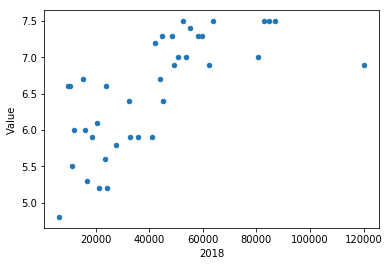

In [70]:
country_stats.plot(kind='scatter', x="2018", y='Value')
plt.show()

In [78]:
model = sklearn.linear_model.LinearRegression()

In [80]:
# Train the model 
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
# Find India's gdp per capita
gdp_per_capita.loc[gdp_per_capita["Country"]=="India"]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2018,Estimates Start After
74,India,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2134.752,2013.0


In [83]:
# Prediction for India's gdp 
X_new = [[2134.752]]
model.predict(X_new)

array([[5.70455762]])

In [85]:
country_stats[["Country", "2018"]].head()

,Country,2018
0,Australia,59655.413
1,Austria,53764.128
2,Belgium,49271.967
3,Brazil,10224.028
4,Canada,48466.329


In [86]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [87]:
# Train the model 
model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [88]:
model.predict(X_new)

array([[6.]])